In [45]:
import pandas as pd
import numpy as np


In [46]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
data.shape

(284807, 31)

<AxesSubplot:ylabel='Class'>

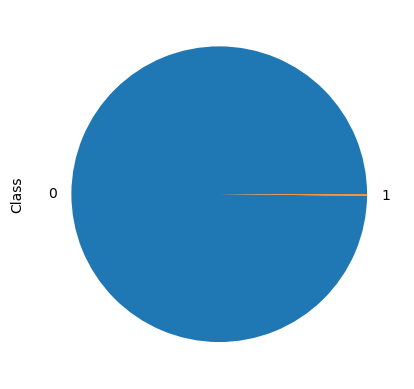

In [48]:
data['Class'].value_counts().plot.pie()

In [49]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

very imbalanced data minority class 1 majority class 0 

In [50]:
x = data.drop(columns=['Class','Time'])
y = data['Class']

In [51]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [53]:
#we can find best randome state 

In [54]:
y_train.value_counts()

0    199006
1       358
Name: Class, dtype: int64

In [55]:
from sklearn.tree import DecisionTreeClassifier
learn_imbalanced_tree = DecisionTreeClassifier()
learn_imbalanced_tree.fit(X_train,y_train)
y_predict_tree = learn_imbalanced_tree.predict(X_test)

In [58]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

precision_imbalanced_tree = precision_score(y_test,y_predict_tree)
recall_imbalanced_tree = recall_score(y_test, y_predict_tree)
f1_imbalanced_tree = f1_score(y_test,y_predict_tree)
print(precision_imbalanced_tree)
print(recall_imbalanced_tree)
print(f1_imbalanced_tree)
print(confusion_matrix(y_true=y_test,y_pred=y_predict_tree))

0.7737226277372263
0.7910447761194029
0.7822878228782287
[[85278    31]
 [   28   106]]


In [59]:
from Meta import MetaCost


In [77]:
cost_matrix = np.array([[0,1000],[1,0]])
cost_matrix

array([[   0, 1000],
       [   1,    0]])

In [78]:
metacost_ = MetaCost(estimator=learn_imbalanced_tree,cost_matrix=cost_matrix,n_estimators=50,n_samples=None,p=True,q=True)

In [79]:
metacost_.fit(X_train,y_train)


resampling data and training ensemble
Finished training ensemble
evaluating optimal class per observation
Finished re-assigning labels
Training model on new data
Finished training model on data with new labels


In [84]:
meta_pred=metacost_.predict(X_test)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [85]:
meta_pred.shape

(85443,)

In [86]:
y_test.shape

(85443,)

In [87]:
cm_meta = confusion_matrix(y_true=y_test,y_pred=meta_pred)
cm_meta

array([[84851,   458],
       [   24,   110]])